In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scapy.all import rdpcap, Ether, IP, Dot1Q
import csv
import math
import os

In [2]:
def extract_pcap_to_csv(pcap_file, csv_file):
    packets = rdpcap(pcap_file)
    first_packet_time = packets[0].time if packets else None

    with open(csv_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['time', 'source', 'destination', 'vlan_prio'])

        for packet in packets:
            if Ether in packet and IP in packet:
                src = packet[IP].src
                dst = packet[IP].dst
                time_since_first = packet.time - first_packet_time
                vlan_prio = 0
                if Dot1Q in packet:
                    if hasattr(packet[Dot1Q], 'prio'):
                        vlan_prio = packet[Dot1Q].prio
                writer.writerow([time_since_first, src, dst, vlan_prio])

In [3]:
def analyze_csv(csv_file):
    df = pd.read_csv(csv_file)

    # Calculer le temps moyen de réception pour chaque priorité
    mean_time_per_prio = df.groupby('vlan_prio')['time'].mean()

    # Afficher les statistiques
    print("Temps moyen de réception pour chaque priorité :")
    print(mean_time_per_prio)

    return df, mean_time_per_prio

In [4]:
def save_plots(df, mean_time_per_prio, output_dir):
    num_prios = len(df['vlan_prio'].dropna().unique())
    rows = math.ceil((num_prios + 1) / 2)
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    plt.figure(figsize=(15, 5))
    mean_time_per_prio.plot(kind='bar')
    plt.title('Temps moyen de réception par priorité VLAN')
    plt.xlabel('Priorité VLAN')
    plt.ylabel('Temps moyen (s)')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'mean_reception_time_per_priority.png'))
    plt.close()

    unique_prios = sorted(df['vlan_prio'].dropna().unique())
    
    for i, prio in enumerate(unique_prios, start=1):
        plt.figure(figsize=(15, 5))
        df_prio = df[df['vlan_prio'] == prio]
        plt.hist(df_prio['time'], bins=50, alpha=0.7, label=f'Priority {prio}')
        plt.title(f'Distribution temporelle des paquets (Priorité {prio})')
        plt.xlabel('Temps (s)')
        plt.ylabel('Nombre de paquets')
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'Distribution_temporelle_priorité_{prio}.png'))
        plt.show()
        plt.close()


In [5]:
def plot_boxplots(df, output_dir):
    plt.figure(figsize=(15, 7))
    df.boxplot(column='time', by='vlan_prio', grid=False)
    plt.title('Distribution temporelle des paquets par priorité VLAN')
    plt.suptitle('')
    plt.xlabel('Priorité VLAN')
    plt.ylabel('Temps (s)')
    plt.savefig(os.path.join(output_dir, 'Distribution_temporelle_par_priorité.png'))
    plt.show()
    plt.close()

In [6]:
def plot_temporal_distribution(df, output_dir):
    interval = 0.1  # Smaller intervals of 0.1 second
    df['time_interval'] = (df['time'] // interval).astype(int)
    
    counts_per_interval_prio = df.groupby(['time_interval', 'vlan_prio']).size().unstack(fill_value=0)

    dominant_prio_per_interval = counts_per_interval_prio.idxmax(axis=1)
    max_counts_per_interval = counts_per_interval_prio.max(axis=1)
    
    plt.figure(figsize=(15, 5))
    unique_prios = sorted(df['vlan_prio'].dropna().unique())
    colors = {6: 'red', 5: 'blue', 4: 'green', 0: 'grey'}
    labels = {6: 'Prio 6', 5: 'Prio 5', 4: 'Prio 4', 0: 'Best Effort'}

    for prio in unique_prios:
        prio_intervals = dominant_prio_per_interval[dominant_prio_per_interval == prio].index
        counts = max_counts_per_interval[prio_intervals]
        plt.bar(prio_intervals * interval, counts, color=colors[prio], width=interval, label=labels[prio], alpha=0.7)

    plt.title('Nombre de paquets par priorité VLAN dans chaque intervalle de temps')
    plt.xlabel('Temps (s)')
    plt.ylabel('Nombre de paquets')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'Temporal_Distribution_Priorities.png'))
    plt.show()
    plt.close()


Temps moyen de réception pour chaque priorité :
vlan_prio
0    50.531372
4    51.077982
5    52.255036
6    53.254270
Name: time, dtype: float64


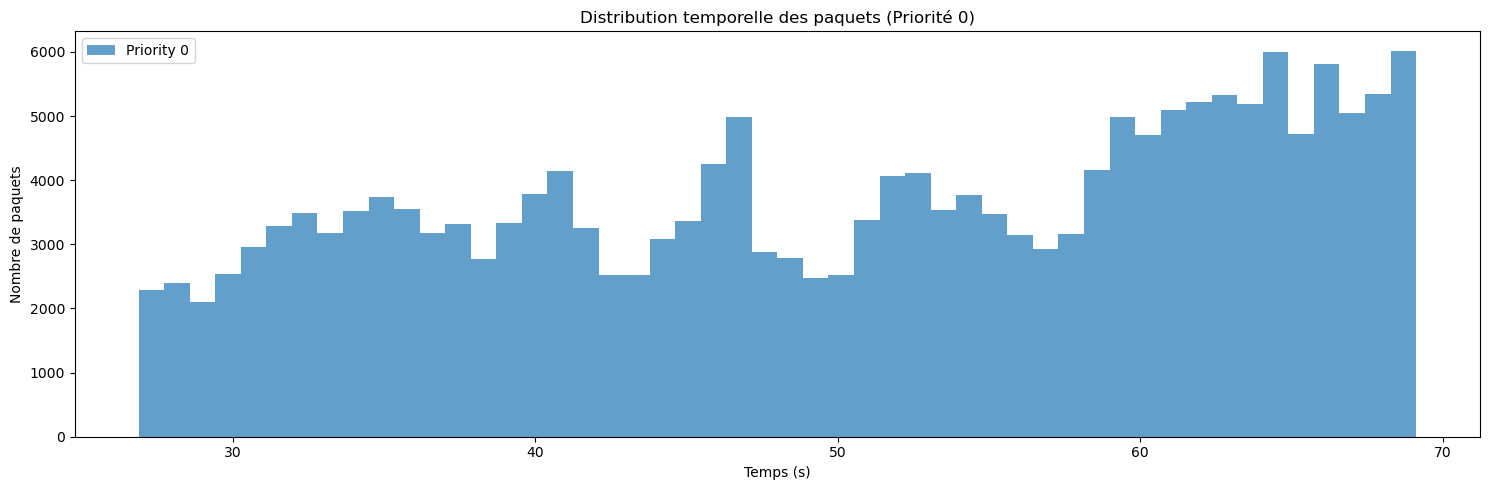

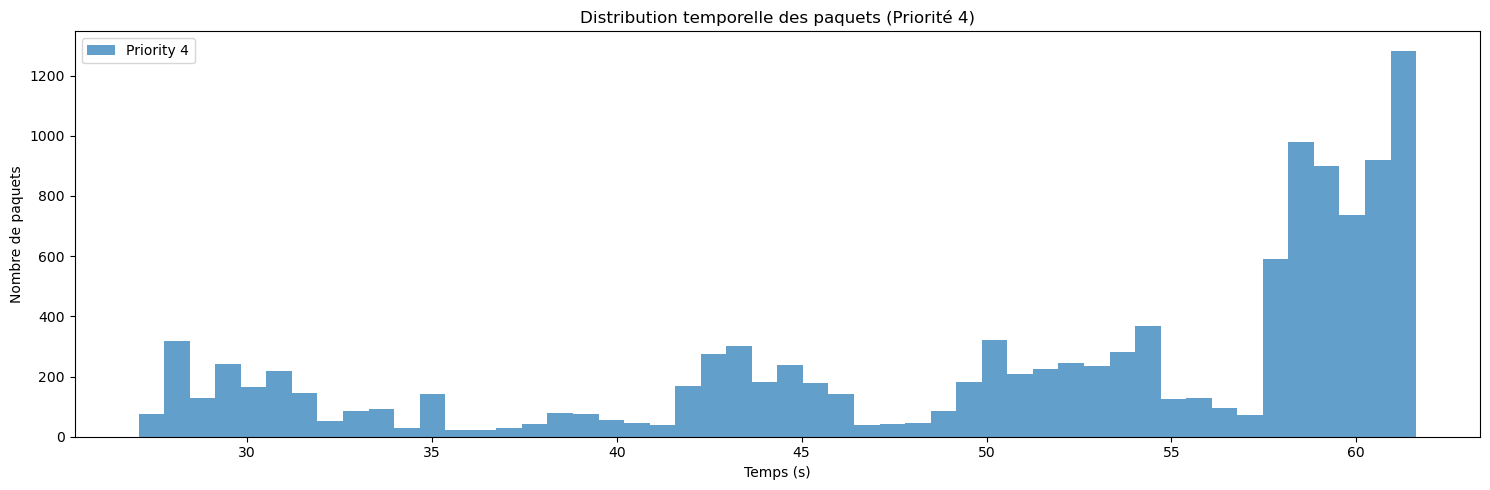

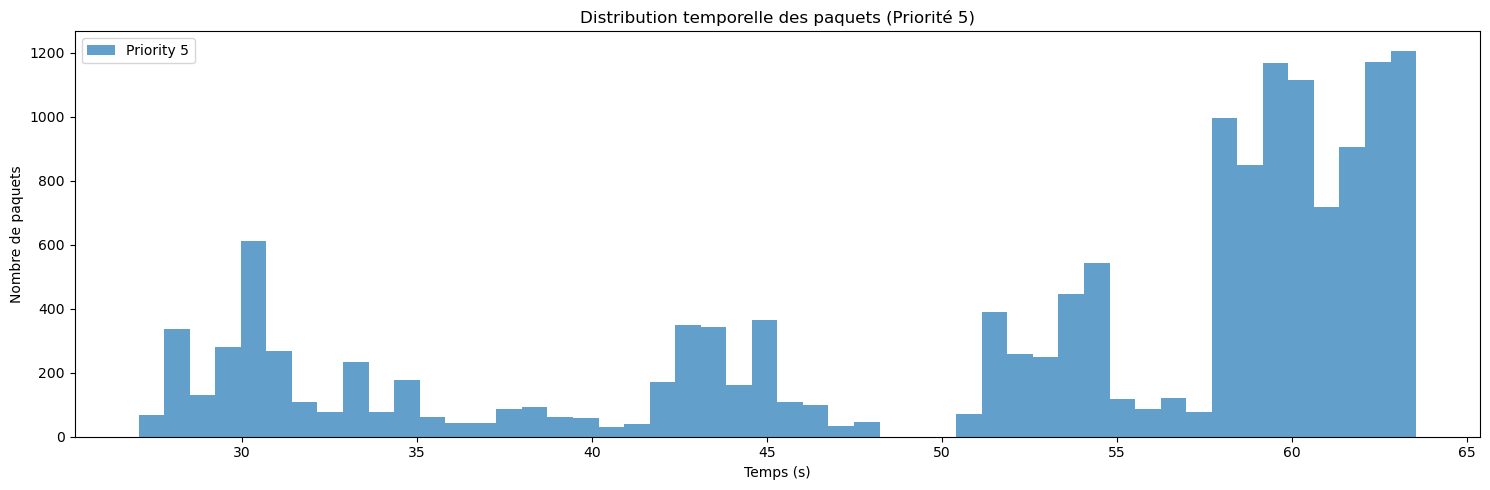

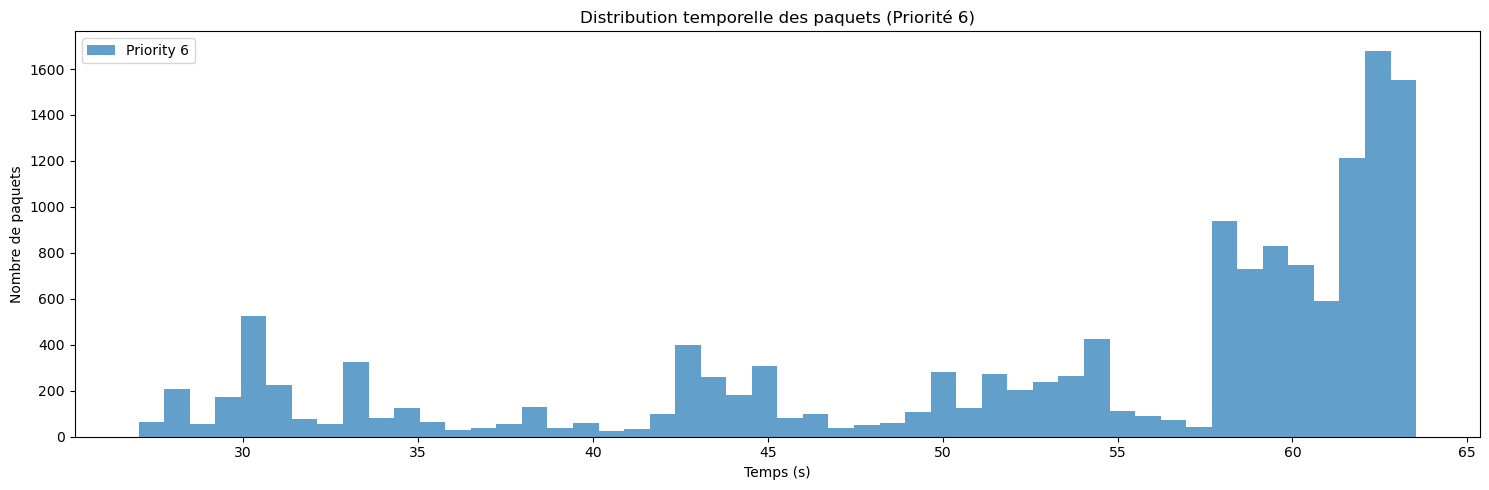

<Figure size 1500x700 with 0 Axes>

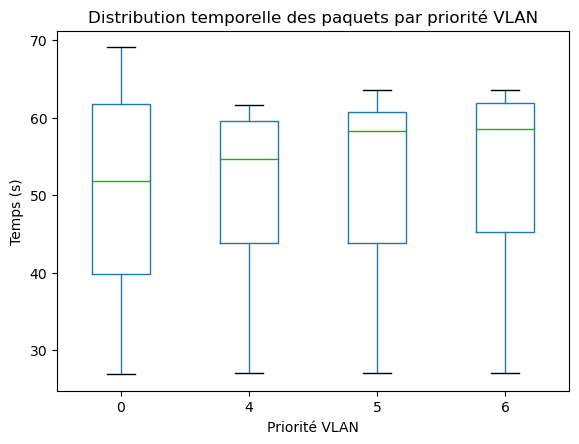

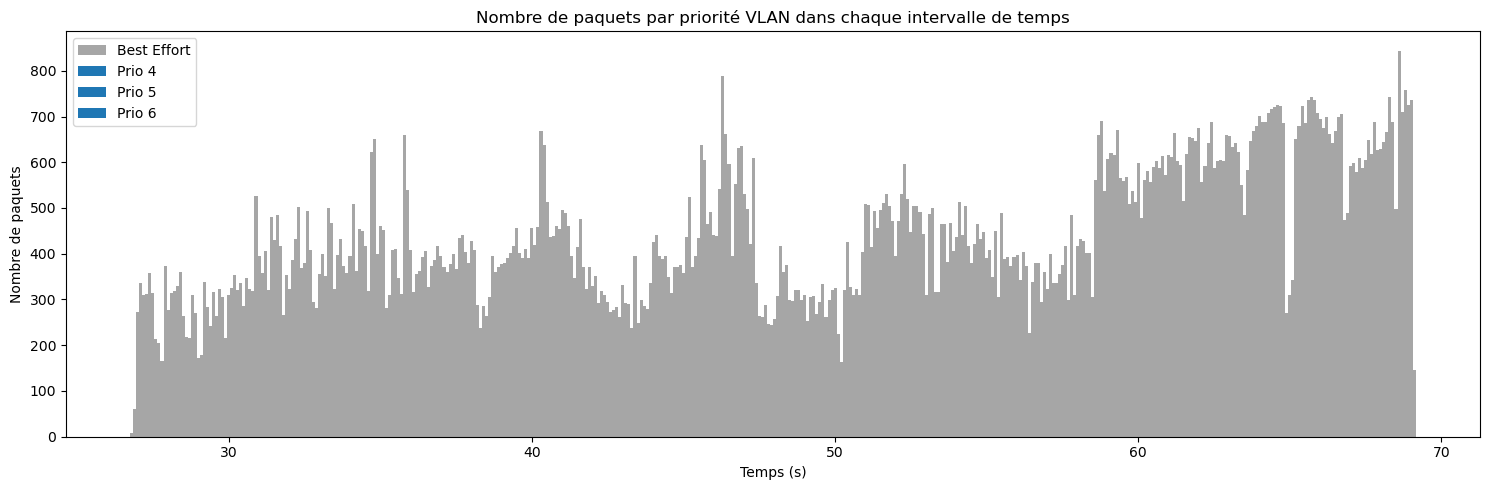

In [7]:
# Usage
output_dir = 'C:/Users/PROBOOK/Documents/MININET_SSH/IMAGES/NORMAL'
pcap_file = 'C:/Users/PROBOOK/Documents/MININET_SSH/RESULT/capture.pcap'
csv_file = 'C:/Users/PROBOOK/Documents/MININET_SSH/RESULT/normal.csv'

# Extraction des données du fichier PCAP vers CSV
extract_pcap_to_csv(pcap_file, csv_file)

# Analyse des données et génération des statistiques
df, mean_time_per_prio = analyze_csv(csv_file)

# Appeler la fonction pour sauvegarder les graphiques
save_plots(df, mean_time_per_prio, output_dir)

# Visualisation des résultats
plot_boxplots(df, output_dir)

# Graphique de la distribution temporelle des paquets par priorité
plot_temporal_distribution(df, output_dir)

Temps moyen de réception pour chaque priorité :
vlan_prio
0    18.992290
4    27.279659
5    25.865104
6    29.987960
Name: time, dtype: float64


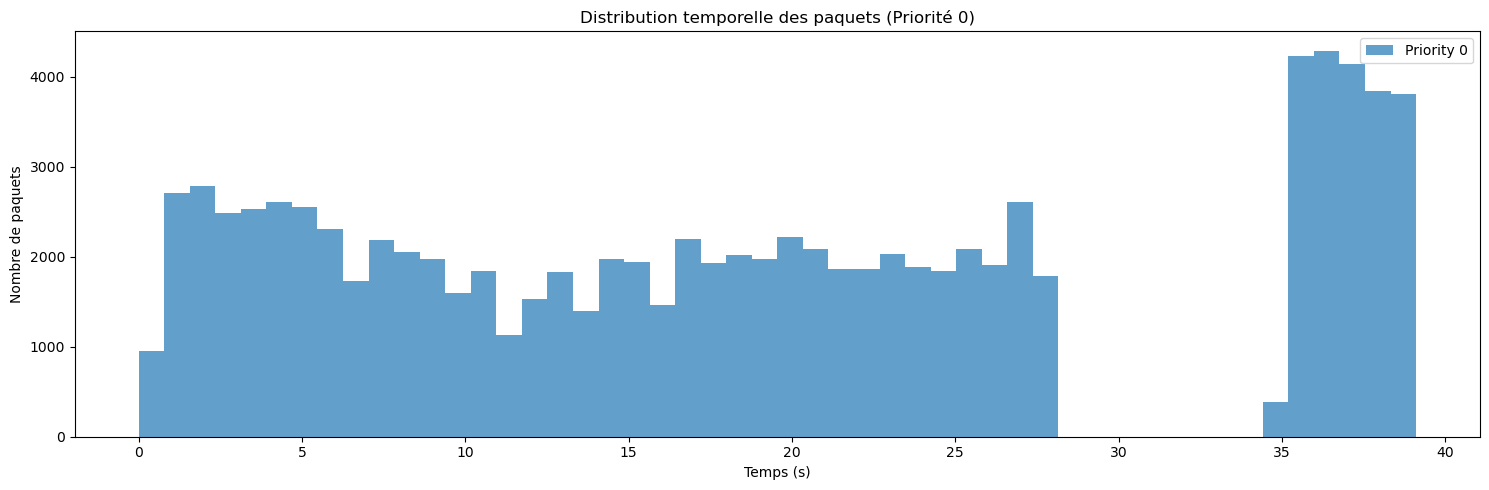

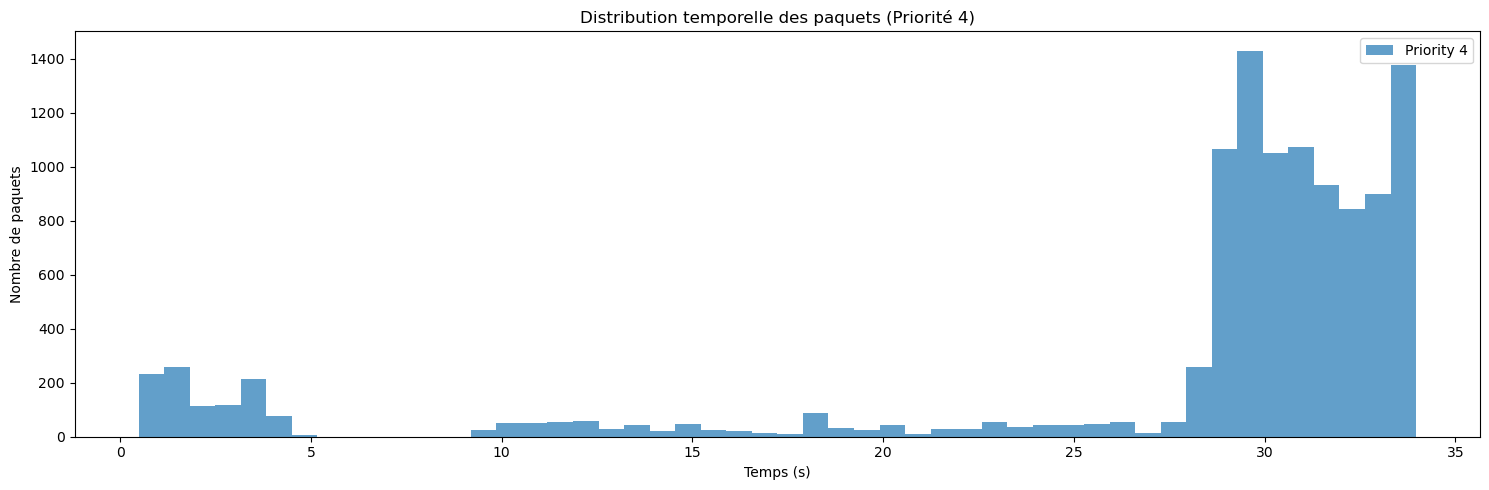

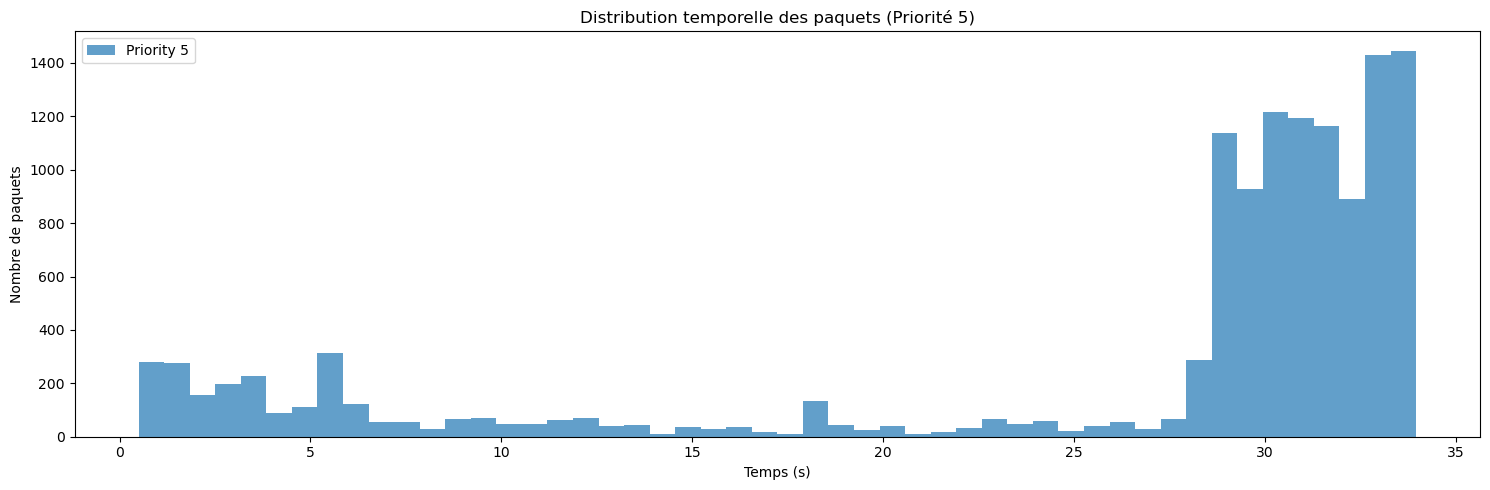

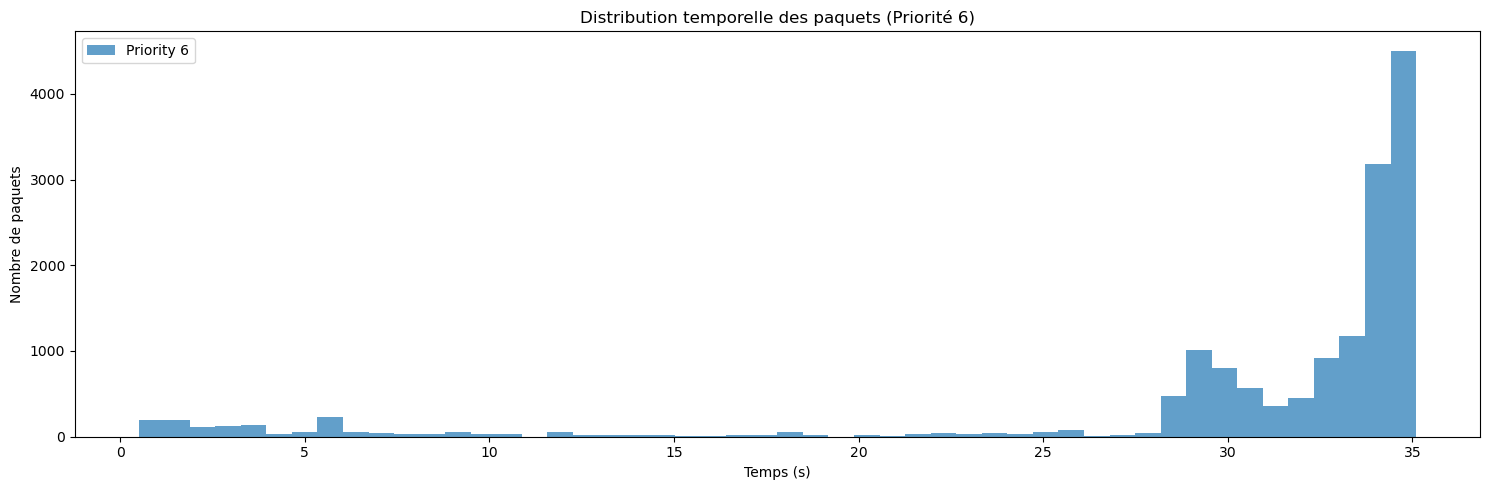

<Figure size 1500x700 with 0 Axes>

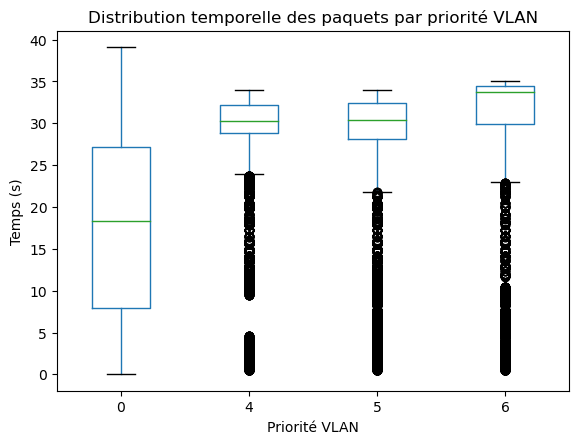

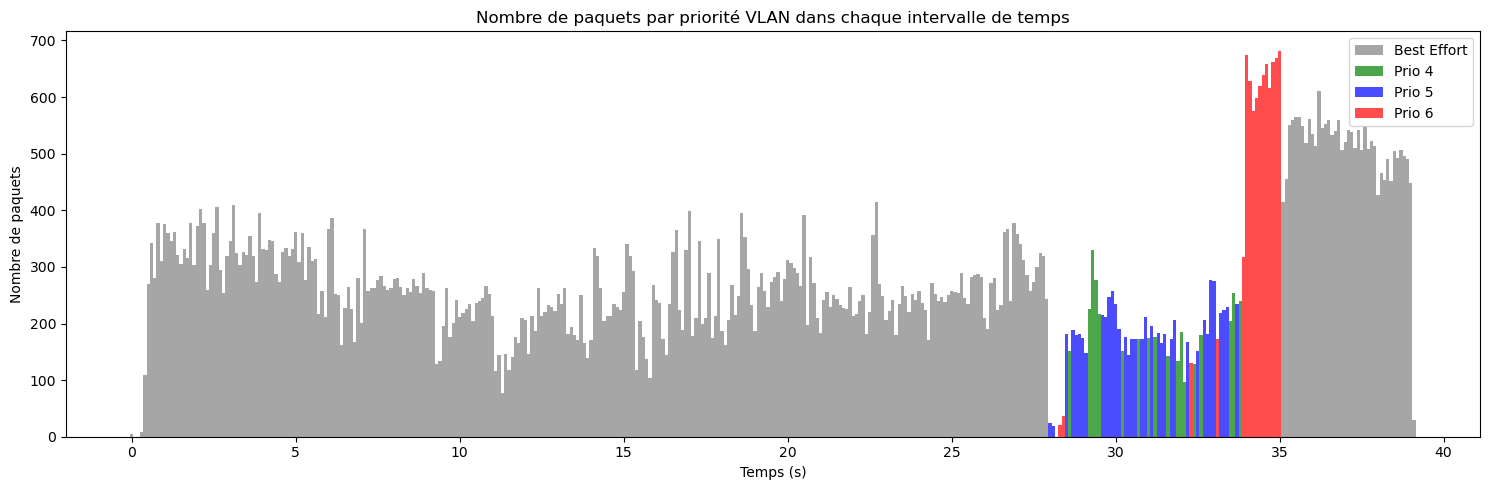

In [10]:
# Usage
output_dir = 'C:/Users/PROBOOK/Documents/MININET_SSH/IMAGES/TSN'
pcap_file = 'C:/Users/PROBOOK/Documents/MININET_SSH/RESULT/capture.pcap'
csv_file = 'C:/Users/PROBOOK/Documents/MININET_SSH/RESULT/hote_tsn.csv'

# Extraction des données du fichier PCAP vers CSV
extract_pcap_to_csv(pcap_file, csv_file)

# Analyse des données et génération des statistiques
df, mean_time_per_prio = analyze_csv(csv_file)

# Appeler la fonction pour sauvegarder les graphiques
save_plots(df, mean_time_per_prio, output_dir)

# Visualisation des résultats
plot_boxplots(df, output_dir)

# Graphique de la distribution temporelle des paquets par priorité
plot_temporal_distribution(df, output_dir)